# 农作物病害检测
AI [挑战赛实验题](https://challenger.ai/competition/pdr2018?type=myteam)

### play with datas

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mping
import torch
import torch.nn as nn
from torchvision import transforms

from data_loader import get_loader

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [88]:
val_basic_path = 'data/2018_validationset_20180905/AgriculturalDisease_validationset/'
file_val = 'data/2018_validationset_20180905/AgriculturalDisease_validationset/AgriculturalDisease_validation_annotations.json'

data_src = pd.read_json(file_val)

In [89]:
data_src.head()

disease_class                                           image_id
0              1               43234193db4aefa1245592ab36d6c946.jpg
1              1               33a59bdf791a831174ec52caf9c61e29.jpg
2              1               8fd00d9a828c3afec94f224bf6e7d654.jpg
3              1               e6ce489a794d4bbd53893df7e0512774.jpg
4              1  75896d3d-899a-4143-9262-c44bcea75237___FREC_Sc...

In [90]:
refer = pd.read_csv("reference.csv")
refer.head()

Label_id                           Label_name
0         0                  apple healthy（苹果健康）
1         1          Apple_Scab general（苹果黑星病一般）
2         2          Apple_Scab serious（苹果黑星病严重）
3         3            Apple Frogeye Spot（苹果灰斑病）
4         4  Cedar Apple Rust  general（苹果雪松锈病一般）

In [91]:
print("总共有{}个分类".format(len(refer)))

总共有61个分类


In [92]:
construct_data = pd.merge(data_src, refer, left_on='disease_class', right_on='Label_id')

In [93]:
construct_data.head()

disease_class                                           image_id  Label_id  \
0              1               43234193db4aefa1245592ab36d6c946.jpg         1   
1              1               33a59bdf791a831174ec52caf9c61e29.jpg         1   
2              1               8fd00d9a828c3afec94f224bf6e7d654.jpg         1   
3              1               e6ce489a794d4bbd53893df7e0512774.jpg         1   
4              1  75896d3d-899a-4143-9262-c44bcea75237___FREC_Sc...         1   

                    Label_name  
0  Apple_Scab general（苹果黑星病一般）  
1  Apple_Scab general（苹果黑星病一般）  
2  Apple_Scab general（苹果黑星病一般）  
3  Apple_Scab general（苹果黑星病一般）  
4  Apple_Scab general（苹果黑星病一般）

### 查看图片数据

class Apple_Scab general（苹果黑星病一般）, size:276*256


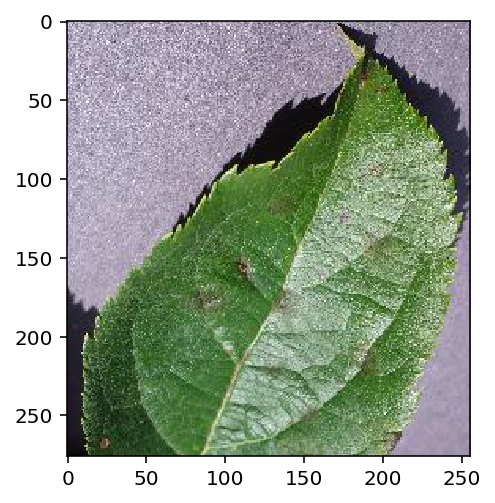

class Tomato YLCV Virus general（番茄黄化曲叶病毒病一般）, size:448*256


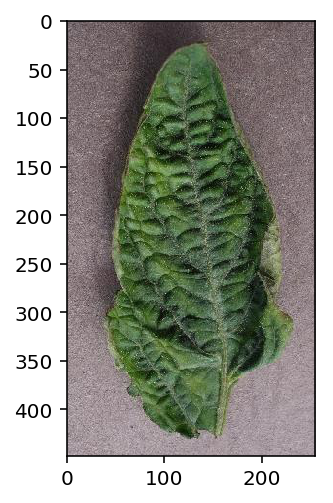

class Tomato YLCV Virus general（番茄黄化曲叶病毒病一般）, size:376*256


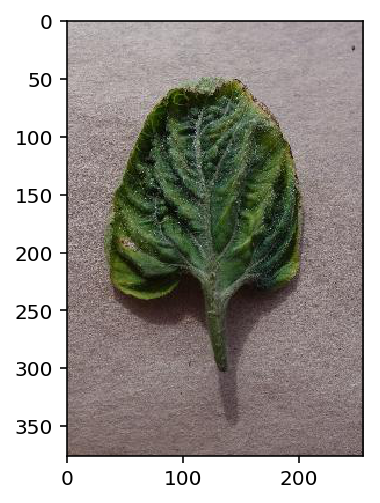

class Tomato YLCV Virus  serious（番茄黄化曲叶病毒病严重）, size:311*256


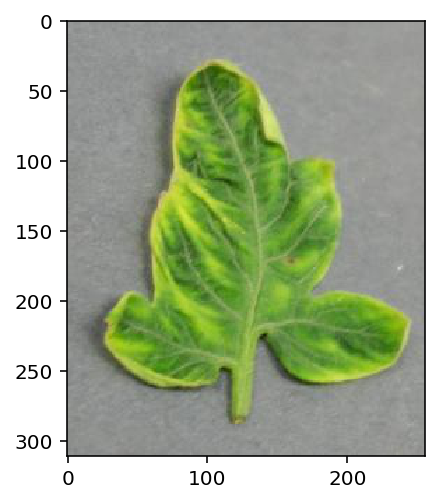

class Tomato YLCV Virus  serious（番茄黄化曲叶病毒病严重）, size:416*256


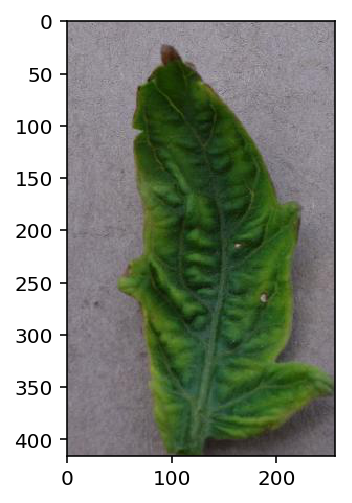

class Tomato YLCV Virus  serious（番茄黄化曲叶病毒病严重）, size:602*256


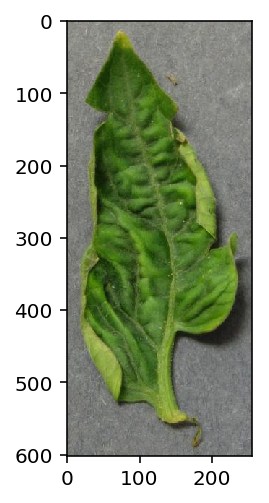

class Tomato_Leaf Mold Fungus general（番茄叶霉病一般）, size:566*256


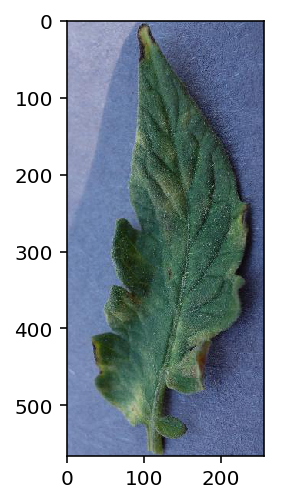

class Tomato Bacterial Spot Bacteria general（番茄疮痂病一般）, size:467*256


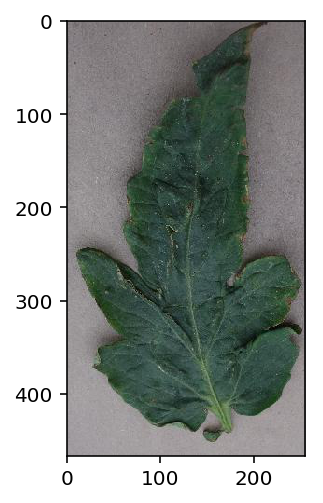

class Tomato Bacterial Spot Bacteria  serious（番茄疮痂病严重）, size:496*256


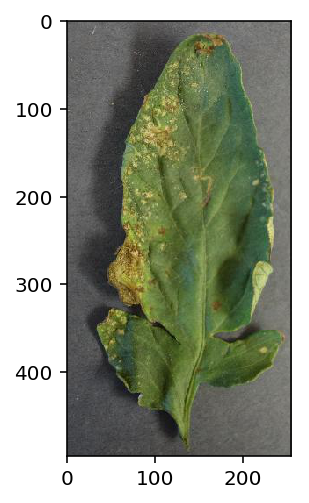

class Grape Black Rot Fungus general（葡萄黑腐病一般）, size:276*256


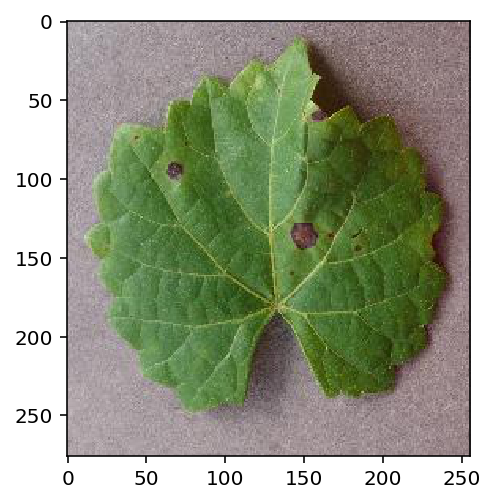

class Pepper scab general（辣椒疮痂病一般）, size:517*256


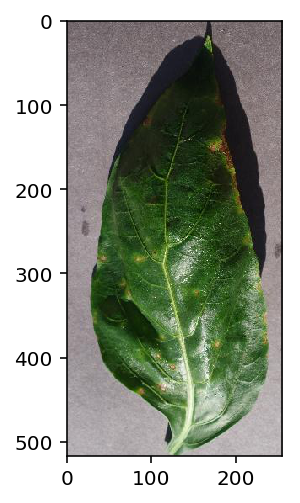

class Tomato_Late Blight Water Mold  general（番茄晚疫病菌一般）, size:440*256


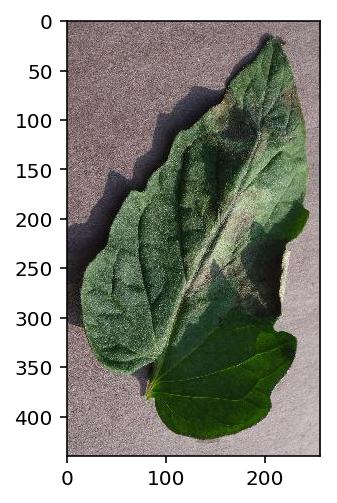

class Tomato_Late Blight Water Mold serious（番茄晚疫病菌严重）, size:301*256


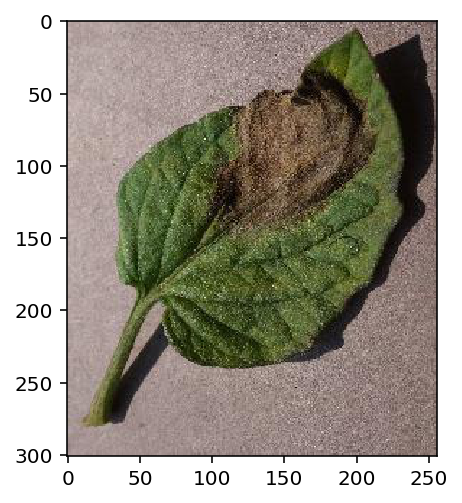

class Strawberry_Scorch general（草莓叶枯病一般）, size:285*256


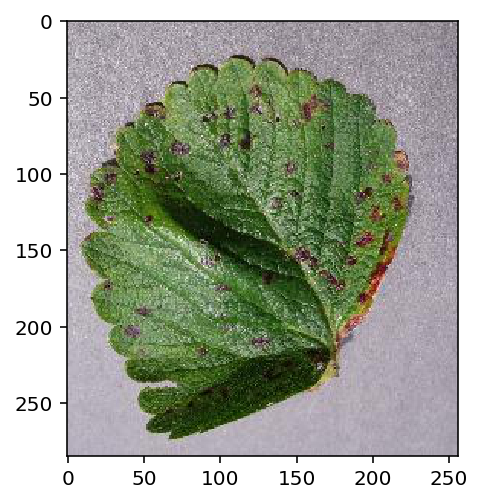

class Maize dwarf mosaic virus（玉米花叶病毒病）, size:256*521


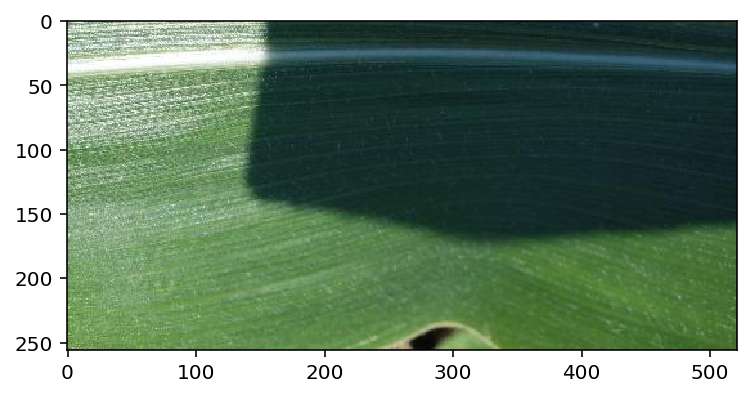

class Maize dwarf mosaic virus（玉米花叶病毒病）, size:256*945


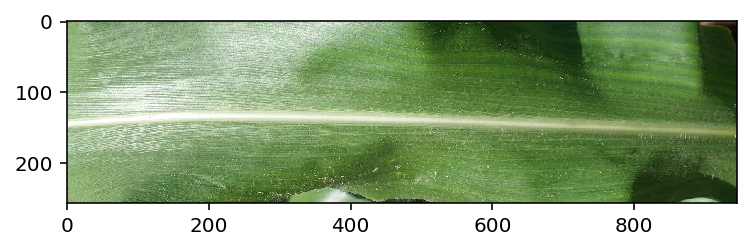

class Tomato_Early Blight Fungus general（番茄早疫病一般）, size:510*256


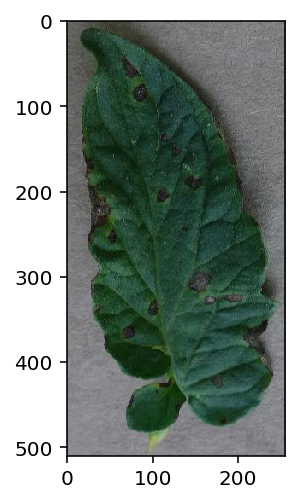

class Grape heathy（葡萄健康）, size:266*256


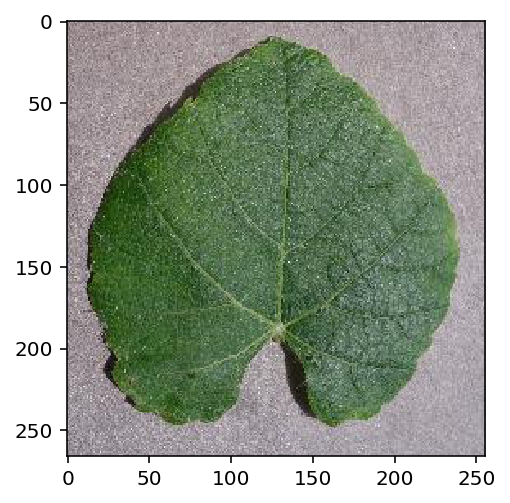

class Grape Black Measles Fungus serious（葡萄轮斑病严重）, size:256*270


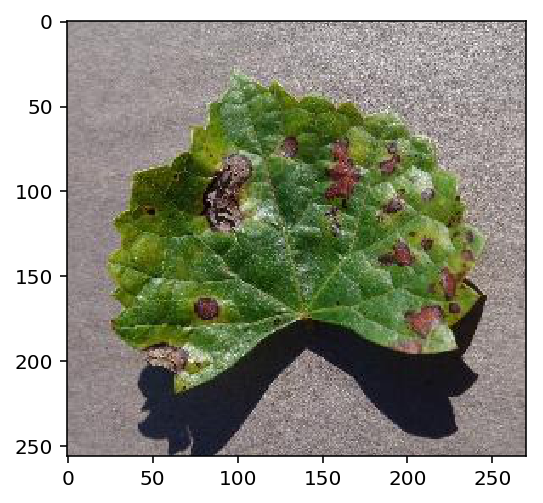

class Potato healthy（马铃薯健康）, size:407*256


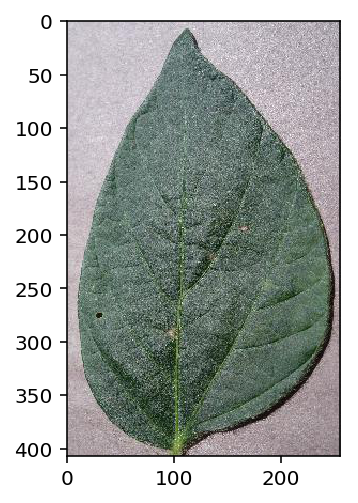

In [19]:
for i in range(10,2000,100):
    img_path = val_basic_path + 'images/' + construct_data.image_id[i]
    img = mping.imread(img_path)
    title = construct_data.Label_name[i]
    print("class {}, size:{}*{}".format(title, img.shape[0], img.shape[1]))
    plt.imshow(img)
#     plt.title(title)
    plt.show()

In [21]:
# 图片格式转化
transform_train = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [81]:
class_data_loader = get_loader(transform_train, mode='test', batch_size=1)

In [82]:
next(iter(class_data_loader))

[tensor([[[[ 1.3413,  1.4098,  1.4440,  ...,  0.2282,  0.2111, -0.8507],
           [ 1.4269,  1.4783,  1.4783,  ..., -0.2513, -0.3369, -0.2171],
           [ 1.4440,  1.4954,  1.4954,  ..., -0.5424,  0.1254, -0.7993],
           ...,
           [ 1.7352,  1.7694,  1.8037,  ...,  1.2557,  1.7523,  1.1529],
           [ 1.5982,  1.5468,  1.7523,  ...,  1.2385,  1.4612,  1.3584],
           [ 1.6153,  1.6153,  1.7865,  ...,  1.3584,  0.9988,  1.6667]],
 
          [[ 1.2381,  1.3081,  1.3431,  ...,  0.7304,  0.6954, -0.8452],
           [ 1.3256,  1.3782,  1.3782,  ...,  0.2402,  0.1527, -0.1975],
           [ 1.3431,  1.3957,  1.3957,  ..., -0.0574,  0.6254, -0.7402],
           ...,
           [ 1.7108,  1.7458,  1.7808,  ...,  1.1681,  1.6758,  1.0630],
           [ 1.5707,  1.5182,  1.7283,  ...,  1.2031,  1.4307,  1.3256],
           [ 1.5882,  1.5882,  1.7633,  ...,  1.3256,  0.9580,  1.6408]],
 
          [[ 1.3328,  1.4025,  1.4374,  ...,  0.4091,  0.4265, -0.8633],
           [ 